## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import glob
import numpy as np
from torchvision import transforms
import torch
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *
import torchvision
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import albumentations
import sklearn.metrics as metrics

In [4]:
torch.cuda.is_available()

True

In [5]:
#torch.cuda.current_device()
torch.cuda.empty_cache()

## Dataset 

In [6]:
path = Path('C:/Users/asims/Desktop/HAR/Dataset')

In [7]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   #get_y     = label_func,
                   get_y     = parent_label,
                   #splitter  = GrandparentSplitter(),
                   splitter  = RandomSplitter(), 
                   item_tfms = [Resize(80)])
                   #batch_tfms= [Normalize.from_stats(*imagenet_stats)]) # , *aug_transforms()],n_inp=1)
dsets = dblock.datasets(path/'train')

In [8]:
dls = dblock.dataloaders(path, bs=32, num_workers=0)

## Models

In [9]:
#resnet34 = cnn_learner(dls, models.resnet34, metrics=[error_rate, accuracy])
#resnet50 = cnn_learner(dls, models.resnet50, metrics=[error_rate, accuracy])
#resnet101 = cnn_learner(dls, models.resnet101, metrics=[error_rate, accuracy])
#densenet121 = cnn_learner(dls, models.densenet121, metrics=[error_rate, accuracy])
#vgg16 = cnn_learner(dls, models.vgg16_bn, metrics=[error_rate, accuracy])
vgg19 = cnn_learner(dls, models.vgg19_bn, metrics=[error_rate, accuracy])
#sq10 = cnn_learner(dls, models.squeezenet1_0, metrics=[error_rate, accuracy])
#sq11 = cnn_learner(dls, models.squeezenet1_1, metrics=[error_rate, accuracy])
#alexnet = cnn_learner(dls, models.alexnet, metrics=[error_rate, accuracy])

## Training

SuggestedLRs(valley=0.0004786300996784121)

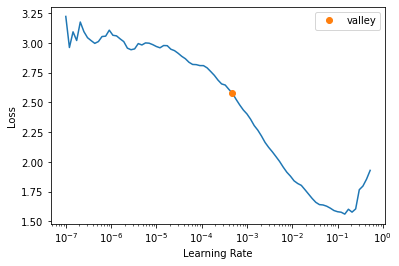

In [61]:
learn.lr_find()

In [46]:
learn.fit_one_cycle(4, 2e-3) #Squeezenet_v1.0

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.101584,0.587179,0.206250,0.793750,00:15
1,0.694190,0.736242,0.170833,0.829167,00:17
2,0.476116,1.303088,0.160417,0.839583,00:18
3,0.363437,0.976019,0.177083,0.822917,00:16


In [62]:
learn.fit_one_cycle(4, 4e-4) #Densenet121

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.293438,0.571305,0.222917,0.777083,00:22
1,0.644062,0.364132,0.143750,0.856250,00:22
2,0.374506,0.296834,0.108333,0.891667,00:22
3,0.248400,0.287134,0.114583,0.885417,00:22


In [54]:
learn.fit_one_cycle(4, 1e-3) #Squeezenet_v1.1

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.189103,0.417553,0.164583,0.835417,00:16
1,0.636627,0.579576,0.147917,0.852083,00:15
2,0.451880,0.643574,0.145833,0.854167,00:15
3,0.379898,0.613016,0.147917,0.852083,00:16


In [12]:
learn.fit_one_cycle(4, 2e-3) #resnet34

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.161043,0.467567,0.175000,0.825000,00:17
1,0.577768,0.292310,0.100000,0.900000,00:18
2,0.317798,0.194871,0.062500,0.937500,00:18
3,0.188799,0.183710,0.062500,0.937500,00:18


In [11]:
learn.fit_one_cycle(4, 6e-4) #resnet50

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.250906,0.494267,0.172917,0.827083,00:19
1,0.729381,0.480907,0.162500,0.837500,00:20
2,0.473541,0.395336,0.139583,0.860417,00:19
3,0.294381,0.401593,0.139583,0.860417,00:19


In [12]:
learn.fit_one_cycle(4, 1e-3) #resnet101

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.755934,0.626225,0.204167,0.795833,00:22
1,0.520045,0.342396,0.120833,0.879167,00:22
2,0.295391,0.306002,0.102083,0.897917,00:22
3,0.165392,0.284082,0.102083,0.897917,00:22


In [20]:
learn.fit_one_cycle(4, 2e-3) #alexnet

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.072771,0.466514,0.208333,0.791667,00:15
1,0.666127,0.493920,0.172917,0.827083,00:16
2,0.487996,0.479295,0.172917,0.827083,00:16
3,0.426827,0.496275,0.193750,0.806250,00:15


In [29]:
learn.fit_one_cycle(4, 1e-3) #vgg16

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.207508,0.407395,0.160417,0.839583,00:20
1,0.570066,0.319178,0.120833,0.879167,00:20
2,0.334760,0.231732,0.093750,0.906250,00:20
3,0.211550,0.229845,0.093750,0.906250,00:19


In [38]:
learn.fit_one_cycle(4, 2e-3) #VGG19

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.039024,0.441926,0.162500,0.837500,00:21
1,0.487507,0.239037,0.091667,0.908333,00:21
2,0.231443,0.209835,0.062500,0.937500,00:21
3,0.128110,0.201945,0.064583,0.935417,00:21


In [63]:
learn.save("Densenet121")

Path('models/Densenet121.pth')

## Predictions

In [10]:
vgg19 = vgg19.load('vgg19')

In [ ]:
from pathlib import Path
def predict():
    pred = []
    true = []
    classes = []
    p = Path(path/'test')
    temp = []
    for subdir in p.ls():
        for fn in subdir.glob('*.png'):
            x = vgg19.predict(fn)
            pred.append(str(x[0]))
            true.append(subdir.name)
        classes.append(subdir.name)
    return pred, true, classes

y_pred, y_true, classes = predict()

### Densenet121

In [89]:
metrics.accuracy_score(y_true, y_pred)

0.9666666666666667

In [90]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9667100223588996

In [91]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9669542704336518

In [92]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.9666666666666667

### Resnet34

In [102]:
metrics.accuracy_score(y_true, y_pred)

0.9733333333333334

In [103]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9732612945475335

In [104]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9743368109704744

In [105]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.9733333333333334

### Resnet50

In [13]:
metrics.accuracy_score(y_true, y_pred)

0.96

In [14]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9600693269364254

In [15]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9605449266731184

In [16]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.96

### Resnet101

In [19]:
metrics.accuracy_score(y_true, y_pred)

0.9716666666666667

In [20]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9716103814884304

In [21]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9719423558897243

In [22]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.9716666666666667

### Sqv1_0

In [37]:
metrics.accuracy_score(y_true, y_pred)

0.8966666666666666

In [38]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.8972534953922432

In [39]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9002509178797438

In [40]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.8966666666666666

### Sqv1_1

In [43]:
metrics.accuracy_score(y_true, y_pred)

0.93

In [44]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.92937371316838

In [45]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9291553234701537

In [46]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.93

### VGG16

In [25]:
metrics.accuracy_score(y_true, y_pred)

0.9683333333333334

In [26]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.96826457505718

In [27]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9687163066387098

In [28]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.9683333333333334

### VGG19

In [31]:
metrics.accuracy_score(y_true, y_pred)

0.98

In [32]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.9799915831229113

In [33]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.9799996666333299

In [34]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.98

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=1000)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":30} )

ax.yaxis.set_ticklabels(classes,fontsize =30, rotation=45)
ax.xaxis.set_ticklabels(classes,fontsize =30, rotation=45)

#plt.show()

plt.savefig("%s.png" % 'cm', format='png', dpi=1000, bbox_inches='tight')
plt.savefig("%s.eps" % 'cm', format='eps', dpi=1000, bbox_inches='tight')
plt.savefig("%s.jpg" % 'cm', format='jpg', dpi=1000, bbox_inches='tight')
plt.savefig("%s.tiff" % 'cm', format='tiff', dpi=1000, bbox_inches='tight')
plt.savefig("%s.pdf" % 'cm', dpi=300, bbox_inches='tight') 


### Alexnet 

In [51]:
metrics.accuracy_score(y_true, y_pred)

0.8916666666666667

In [52]:
metrics.f1_score(y_true, y_pred, average='weighted')

0.8907729081109372

In [53]:
metrics.precision_score(y_true, y_pred, average='weighted')

0.8901876314039415

In [54]:
metrics.recall_score(y_true, y_pred, average='weighted')

0.8916666666666667